In [18]:
#imported necessary packages
import os

import pandas as pd

import datetime

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

os.getcwd()




'/Users/satvikreddy/Downloads/springboard'

In [19]:
#brought in csv as dataframe
df = pd.read_csv('players.csv')
df = df.drop(columns=['Unnamed: 0','Unnamed: 23'])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,All-NBA
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,NaN
1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,NaN
2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,NaN
3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,NaN
4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,NaN


In [20]:
#created folders for saving future analysis of data
#os.mkdir('datacap2')
#os.mkdir('figurescap2')
#os.mkdir('modelscap2')

In [21]:
os.listdir()

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 'API',
 'Capstone2Satvik.ipynb',
 'CountryClub.ipynb',
 'datacap2',
 'fig1.png',
 'fig2.png',
 'fig3.png',
 'figurescap2',
 'Frequentist Case Study',
 'FrequentistPartA.ipynb',
 'GuidedCapstoneProjectReport.pdf',
 'GuidedCapstoneStep4andstep5HL.ipynb',
 'GuidedCapstoneStep6HL.ipynb',
 'inferencestudy',
 'insurance2.csv',
 'modelscap2',
 'myfirstassignment.ipynb',
 'Notebook_stepthree.ipynb',
 'Notebook_steptwo.ipynb',
 'players.csv',
 'README.md',
 'SQLFiles Tier 1 3',
 'sqlite\\db\\pythonsqlite.db',
 'sqlite_db_pythonsqlite.db',
 'SQLTasksTier1.sql',
 'SQLTasksTier1.sql.doc',
 'SQLTasksTier1.sql.txt',
 'step1.csv',
 'tier3.ipynb',
 '~$LTasksTier1.sql.doc']

In [22]:
#There are no missing values except for All-NBA column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  int64  
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [23]:
df.shape

(11145, 22)

In [24]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,All-NBA
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,345.000000
mean,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,2.000000
std,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.817682
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,1.000000
50%,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,2.000000
75%,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,3.000000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,3.000000


In [25]:
#Replaced NaN with 0 for All-NBA column
df['All-NBA'] = df['All-NBA'].fillna(0)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,All-NBA
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0.0
1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0.0
2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0.0
3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0.0
4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0.0


In [26]:
#Checked for duplicates; there were none
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,All-NBA


In [27]:
#Changed All-NBA to All-Star
df = df.rename(columns = {'All-NBA':'All-Star'})

In [28]:
#Changed values in season column to only include the four digits corresponding to year that the season STARTED in
df['season'] = df['season'].astype(str)
df['season'] = df['season'].str.slice(stop=4)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,All-Star
0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996,0.0
1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996,0.0
2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996,0.0
3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996,0.0
4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996,0.0


In [29]:
#deleted all rows that didn't correspond to rookie season
df = df.query('draft_year == season')
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,All-Star
21,Erick Dampier,IND,21,210.82,120.20188,Mississippi State,USA,1996,1,10,...,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996,0.0
30,Derek Fisher,LAL,22,185.42,90.71840,Arkansas-Little Rock,USA,1996,1,24,...,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996,0.0
68,Jamie Feick,SAS,22,203.20,115.66596,Michigan State,USA,1996,2,48,...,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996,0.0
73,Jason Sasser,DAL,23,200.66,102.05820,Texas Tech,USA,1996,2,41,...,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996,0.0
77,Jeff McInnis,DEN,22,193.04,86.18248,North Carolina,USA,1996,2,37,...,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996,0.0


In [30]:
#converted to csv so that I could add in All-Star data
df.to_csv('/Users/satvikreddy/Downloads/Springboard/datacap2/step1.csv')

In [31]:
#reading new csv back into a new dataframe
import os

import pandas as pd

import datetime

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

os.getcwd()


'/Users/satvikreddy/Downloads/springboard'

In [32]:
df = pd.read_csv('step1.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Future All-Star
0,Erick Dampier,IND,21,210.82,120.20188,Mississippi State,USA,1996,1,10,...,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996,NaN
1,Derek Fisher,LAL,22,185.42,90.71840,Arkansas-Little Rock,USA,1996,1,24,...,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996,NaN
2,Jamie Feick,SAS,22,203.20,115.66596,Michigan State,USA,1996,2,48,...,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996,NaN
3,Jason Sasser,DAL,23,200.66,102.05820,Texas Tech,USA,1996,2,41,...,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996,NaN
4,Jeff McInnis,DEN,22,193.04,86.18248,North Carolina,USA,1996,2,37,...,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996,NaN


In [33]:
df['Future All-Star'] = df['Future All-Star'].fillna(0)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Future All-Star
0,Erick Dampier,IND,21,210.82,120.20188,Mississippi State,USA,1996,1,10,...,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996,0.0
1,Derek Fisher,LAL,22,185.42,90.71840,Arkansas-Little Rock,USA,1996,1,24,...,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996,0.0
2,Jamie Feick,SAS,22,203.20,115.66596,Michigan State,USA,1996,2,48,...,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996,0.0
3,Jason Sasser,DAL,23,200.66,102.05820,Texas Tech,USA,1996,2,41,...,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996,0.0
4,Jeff McInnis,DEN,22,193.04,86.18248,North Carolina,USA,1996,2,37,...,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996,0.0


In [34]:
df.shape

(1079, 22)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        1079 non-null   object 
 1   team_abbreviation  1079 non-null   object 
 2   age                1079 non-null   int64  
 3   player_height      1079 non-null   float64
 4   player_weight      1079 non-null   float64
 5   college            1079 non-null   object 
 6   country            1079 non-null   object 
 7   draft_year         1079 non-null   object 
 8   draft_round        1079 non-null   object 
 9   draft_number       1079 non-null   object 
 10  gp                 1079 non-null   int64  
 11  pts                1079 non-null   float64
 12  reb                1079 non-null   float64
 13  ast                1079 non-null   float64
 14  net_rating         1079 non-null   float64
 15  oreb_pct           1079 non-null   float64
 16  dreb_pct           1079 

In [36]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Future All-Star
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,21.863763,201.001335,99.614100,46.607044,5.622243,2.596015,1.191474,-5.264319,0.059444,0.133750,0.186104,0.483504,0.116631,2007.783133,0.110287
std,1.503543,8.764577,12.084898,25.127751,4.259237,1.891778,1.360864,13.853115,0.044414,0.057324,0.047791,0.106572,0.095742,6.974726,0.313393
min,18.000000,175.260000,68.038800,1.000000,0.000000,0.000000,0.000000,-150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000,0.000000
25%,21.000000,195.580000,90.718400,25.000000,2.600000,1.200000,0.300000,-8.700000,0.025000,0.092000,0.156000,0.449000,0.056000,2002.000000,0.000000
50%,22.000000,200.660000,99.790240,49.000000,4.400000,2.100000,0.700000,-4.000000,0.048000,0.127000,0.183000,0.496000,0.089000,2008.000000,0.000000
75%,23.000000,208.280000,108.635284,70.000000,7.600000,3.500000,1.500000,0.000000,0.091000,0.169000,0.215000,0.538000,0.152500,2014.000000,0.000000
max,30.000000,226.060000,155.582056,82.000000,23.600000,12.100000,8.300000,66.700000,0.400000,0.500000,0.389000,1.064000,1.000000,2019.000000,1.000000


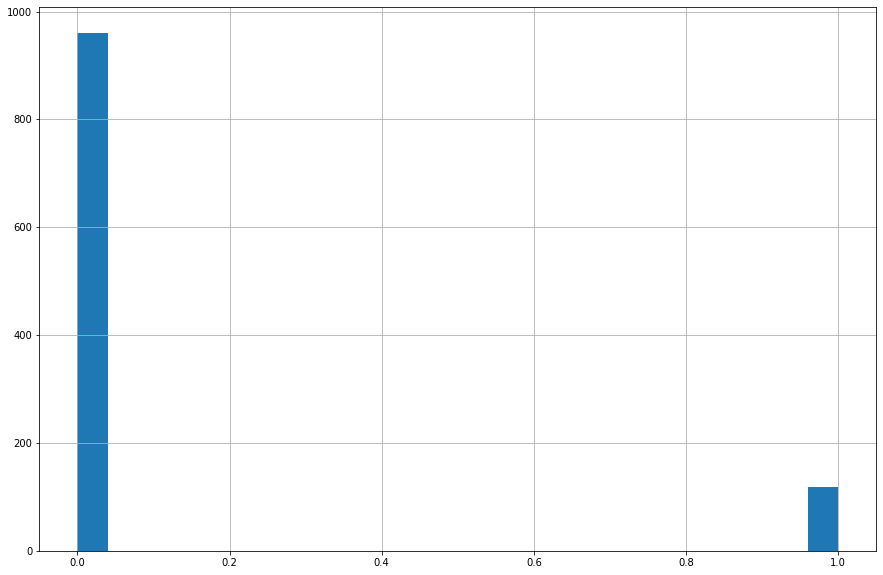

In [38]:
df['Future All-Star'].hist(bins=25,figsize=(15, 10))

In [39]:
#Calculate the correlation coefficients
corr = df.corr(method="pearson")
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Future All-Star
age,1.000000,-0.100000,-0.000000,-0.150000,-0.220000,-0.190000,-0.130000,0.020000,0.020000,-0.060000,-0.140000,-0.050000,-0.020000,-0.210000,-0.170000
player_height,-0.100000,1.000000,0.780000,-0.050000,-0.100000,0.340000,-0.470000,-0.050000,0.540000,0.560000,-0.160000,0.010000,-0.620000,-0.060000,0.030000
player_weight,-0.000000,0.780000,1.000000,-0.050000,-0.090000,0.320000,-0.430000,-0.020000,0.590000,0.550000,-0.130000,0.030000,-0.520000,-0.110000,0.030000
gp,-0.150000,-0.050000,-0.050000,1.000000,0.630000,0.580000,0.450000,0.170000,-0.020000,0.050000,0.000000,0.350000,0.100000,-0.050000,0.300000
pts,-0.220000,-0.100000,-0.090000,0.630000,1.000000,0.720000,0.660000,0.110000,-0.070000,0.020000,0.360000,0.360000,0.220000,0.010000,0.420000
reb,-0.190000,0.340000,0.320000,0.580000,0.720000,1.000000,0.290000,0.130000,0.360000,0.500000,0.070000,0.330000,-0.110000,0.000000,0.390000
ast,-0.130000,-0.470000,-0.430000,0.450000,0.660000,0.290000,1.000000,0.090000,-0.320000,-0.230000,0.220000,0.130000,0.670000,0.010000,0.300000
net_rating,0.020000,-0.050000,-0.020000,0.170000,0.110000,0.130000,0.090000,1.000000,0.120000,0.040000,0.050000,0.190000,0.020000,-0.050000,0.080000
oreb_pct,0.020000,0.540000,0.590000,-0.020000,-0.070000,0.360000,-0.320000,0.120000,1.000000,0.530000,-0.010000,0.150000,-0.400000,-0.210000,0.070000
dreb_pct,-0.060000,0.560000,0.550000,0.050000,0.020000,0.500000,-0.230000,0.040000,0.530000,1.000000,-0.070000,0.130000,-0.360000,0.030000,0.110000


In [46]:
df['draft_number'] = pd.to_numeric(df['draft_number'],errors='coerce')


0       10.0
1       24.0
2       48.0
3       41.0
4       37.0
        ... 
1074    17.0
1075    31.0
1076    27.0
1077    54.0
1078    20.0
Name: draft_number, Length: 1079, dtype: float64

In [47]:
df['draft_round'] = pd.to_numeric(df['draft_round'],errors='coerce')
df['draft_year'] = pd.to_numeric(df['draft_year'],errors='coerce')

In [48]:
df['draft_year']

0       1996.0
1       1996.0
2       1996.0
3       1996.0
4       1996.0
         ...  
1074    2019.0
1075    2019.0
1076    2019.0
1077    2019.0
1078    2019.0
Name: draft_year, Length: 1079, dtype: float64

In [49]:
#Calculate the correlation coefficients
corr = df.corr(method="pearson")
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Future All-Star
age,1.000000,-0.100000,-0.000000,-0.210000,0.360000,0.410000,-0.150000,-0.220000,-0.190000,-0.130000,0.020000,0.020000,-0.060000,-0.140000,-0.050000,-0.020000,-0.210000,-0.170000
player_height,-0.100000,1.000000,0.780000,-0.050000,-0.080000,-0.120000,-0.050000,-0.100000,0.340000,-0.470000,-0.050000,0.540000,0.560000,-0.160000,0.010000,-0.620000,-0.060000,0.030000
player_weight,-0.000000,0.780000,1.000000,-0.110000,-0.000000,-0.040000,-0.050000,-0.090000,0.320000,-0.430000,-0.020000,0.590000,0.550000,-0.130000,0.030000,-0.520000,-0.110000,0.030000
draft_year,-0.210000,-0.050000,-0.110000,1.000000,0.030000,0.060000,-0.060000,0.000000,-0.000000,0.000000,-0.050000,-0.210000,0.030000,-0.180000,0.000000,-0.040000,1.000000,-0.120000
draft_round,0.360000,-0.080000,-0.000000,0.030000,1.000000,0.850000,-0.400000,-0.380000,-0.330000,-0.220000,-0.080000,-0.010000,-0.060000,-0.170000,-0.140000,-0.020000,0.030000,-0.180000
draft_number,0.410000,-0.120000,-0.040000,0.060000,0.850000,1.000000,-0.490000,-0.540000,-0.480000,-0.330000,-0.070000,-0.010000,-0.090000,-0.210000,-0.180000,-0.040000,0.060000,-0.260000
gp,-0.150000,-0.050000,-0.050000,-0.060000,-0.400000,-0.490000,1.000000,0.630000,0.580000,0.450000,0.170000,-0.020000,0.050000,0.000000,0.350000,0.100000,-0.050000,0.300000
pts,-0.220000,-0.100000,-0.090000,0.000000,-0.380000,-0.540000,0.630000,1.000000,0.720000,0.660000,0.110000,-0.070000,0.020000,0.360000,0.360000,0.220000,0.010000,0.420000
reb,-0.190000,0.340000,0.320000,-0.000000,-0.330000,-0.480000,0.580000,0.720000,1.000000,0.290000,0.130000,0.360000,0.500000,0.070000,0.330000,-0.110000,0.000000,0.390000
ast,-0.130000,-0.470000,-0.430000,0.000000,-0.220000,-0.330000,0.450000,0.660000,0.290000,1.000000,0.090000,-0.320000,-0.230000,0.220000,0.130000,0.670000,0.010000,0.300000


In [50]:
# Step 1. Call the variable corr_matrix
corr_matrix = df.drop(['Future All-Star'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['season']


In [55]:
df = df.drop(columns=['season'])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Future All-Star
0,Erick Dampier,IND,21,210.82,120.20188,Mississippi State,USA,1996.0,1.0,10.0,...,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,0.0
1,Derek Fisher,LAL,22,185.42,90.71840,Arkansas-Little Rock,USA,1996.0,1.0,24.0,...,3.9,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,0.0
2,Jamie Feick,SAS,22,203.20,115.66596,Michigan State,USA,1996.0,2.0,48.0,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,0.0
3,Jason Sasser,DAL,23,200.66,102.05820,Texas Tech,USA,1996.0,2.0,41.0,...,2.4,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,0.0
4,Jeff McInnis,DEN,22,193.04,86.18248,North Carolina,USA,1996.0,2.0,37.0,...,5.0,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,0.0


In [57]:
from sklearn.cluster import KMeans
x = df.drop(['player_name','team_abbreviation', 'college','country'], axis =1).values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [58]:
df.to_csv('/Users/satvikreddy/Downloads/Springboard/df2.csv')

In [60]:
df = pd.read_csv('df2.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Future All-Star
0,Erick Dampier,IND,21,210.82,120.20188,Mississippi State,USA,1996,1,10,...,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,0
1,Derek Fisher,LAL,22,185.42,90.71840,Arkansas-Little Rock,USA,1996,1,24,...,3.9,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,0
2,Jamie Feick,SAS,22,203.20,115.66596,Michigan State,USA,1996,2,48,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,0
3,Jason Sasser,DAL,23,200.66,102.05820,Texas Tech,USA,1996,2,41,...,2.4,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,0
4,Jeff McInnis,DEN,22,193.04,86.18248,North Carolina,USA,1996,2,37,...,5.0,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        1079 non-null   object 
 1   team_abbreviation  1079 non-null   object 
 2   age                1079 non-null   int64  
 3   player_height      1079 non-null   float64
 4   player_weight      1079 non-null   float64
 5   college            1079 non-null   object 
 6   country            1079 non-null   object 
 7   draft_year         1079 non-null   int64  
 8   draft_round        1079 non-null   int64  
 9   draft_number       1079 non-null   int64  
 10  gp                 1079 non-null   int64  
 11  pts                1079 non-null   float64
 12  reb                1079 non-null   float64
 13  ast                1079 non-null   float64
 14  net_rating         1079 non-null   float64
 15  oreb_pct           1079 non-null   float64
 16  dreb_pct           1079 

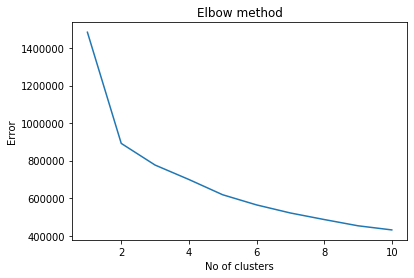

In [63]:
from sklearn.cluster import KMeans
x = df.drop(['player_name','team_abbreviation', 'college','country'], axis =1).values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

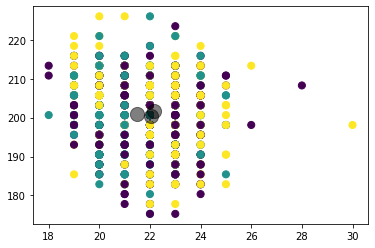

In [64]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [65]:
df['clusters']=y_kmeans3
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Future All-Star,clusters
0,Erick Dampier,IND,21,210.82,120.20188,Mississippi State,USA,1996,1,10,...,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,0,1
1,Derek Fisher,LAL,22,185.42,90.71840,Arkansas-Little Rock,USA,1996,1,24,...,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,0,1
2,Jamie Feick,SAS,22,203.20,115.66596,Michigan State,USA,1996,2,48,...,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,0,0
3,Jason Sasser,DAL,23,200.66,102.05820,Texas Tech,USA,1996,2,41,...,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,0,2
4,Jeff McInnis,DEN,22,193.04,86.18248,North Carolina,USA,1996,2,37,...,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,0,2


In [66]:
df.to_csv('/Users/satvikreddy/Downloads/Springboard/dfc.csv')